# Project - Classification of Human Activities

Disciplina de Tópicos de Ciência de Dados

Joana Simões, nº 2019217013

In [1]:
# imports 
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, f1_score

## Exercise 1.1

In [2]:
def split_train_test(X, y, percentage_test=0.3):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=percentage_test, random_state=42)
    return x_train, x_test, y_train, y_test

In [3]:
def split_k_fold(X, y, k_folds):
    x_train = []
    x_test = []
    y_train = []
    y_test = []

    k_fold = KFold(n_splits=k_folds, random_state=42, shuffle=True)

    for train_index, test_index in k_fold.split(X):
        x_train.append(X.loc[train_index])
        y_train.append(y[train_index])
        x_test.append(X.loc[test_index])
        y_test.append(y[test_index])

    return x_train, x_test, y_train, y_test

## Exercise 1.2

In [4]:
def display_confusion_matrix(cm, labels):
    display = ConfusionMatrixDisplay(cm, display_labels=labels)
    display.plot()
    plt.show()

In [5]:
def calculate_confusion_matrix(y, y_pred, labels=None, display=True):
    cm = confusion_matrix(y, y_pred, labels=labels)
    if display:
        display_confusion_matrix(cm, labels)
    return cm

In [6]:
def calculate_recall(y, y_pred, metric=None):
    score = recall_score(y, y_pred, average=metric)
    return score

In [7]:
def calculate_precision(y, y_pred, metric=None):
    return precision_score(y, y_pred, average=metric)

In [8]:
def calculate_f1(y, y_pred, metric=None):
    return f1_score(y, y_pred, average=metric)

In [9]:
def measure_performance(y, y_pred, labels=None):
    print(calculate_confusion_matrix(y, y_pred, labels))
    print(calculate_recall(y, y_pred))
    print(calculate_precision(y, y_pred))
    print(calculate_f1(y, y_pred))

In [10]:
y = np.array([1,2,1, 3, 2, 1, 1])
y_pred = np.array([1, 1, 1, 3, 2, 2, 1])

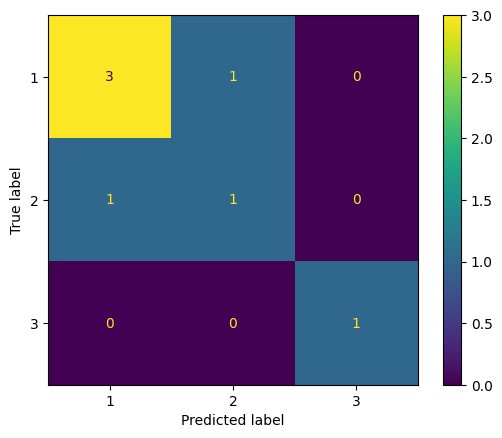

array([[3, 1, 0],
       [1, 1, 0],
       [0, 0, 1]], dtype=int64)

In [11]:
calculate_confusion_matrix(y, y_pred, labels=[1, 2, 3])

In [12]:
calculate_f1(y, y_pred)

array([0.75, 0.5 , 1.  ])

## Exercise 2

In [13]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [14]:
def load_dataset():
    iris_dataset = datasets.load_iris(as_frame=True)
    X = iris_dataset.data
    y = iris_dataset.target
    return X, y

In [15]:
X, y = load_dataset()

In [16]:
X.shape

(150, 4)

### Train-only : k=1

In [17]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X,  y)
y_pred = model.predict(X)

Recall: 1.0
Precision: 1.0
F1 score: 1.0


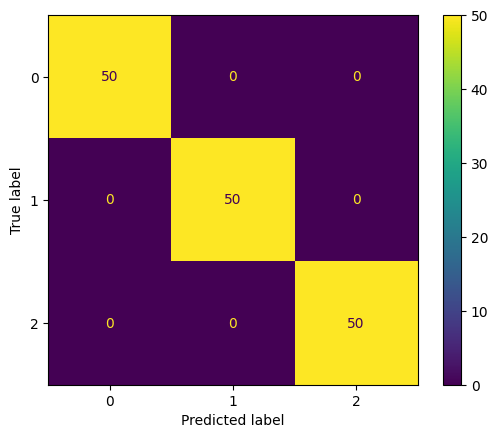

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [18]:
print('Recall:', calculate_recall(y, y_pred, 'weighted'))
print('Precision:',calculate_precision(y, y_pred, 'weighted'))
print('F1 score:',calculate_f1(y, y_pred, 'weighted'))
calculate_confusion_matrix(y, y_pred)

### Train-test 70-30 - k=1

In [19]:
x_train, x_test, y_train, y_test = split_train_test(X, y, 0.3)

Recall: 1.0
Precision: 1.0
F1 score: 1.0


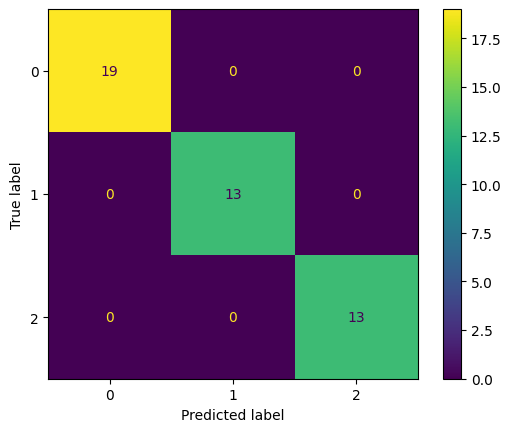

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [20]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:',calculate_precision(y_test, y_pred, 'weighted'))
print('F1 score:',calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred)

### 10CV - k=1

In [21]:
x_train, x_test, y_train, y_test = split_k_fold(X, y, 10)

In [22]:
recalls = []
precisions = []
f1_scores = []
confusion_matrices = []
for i in range(len(x_train)):
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(x_train[i], y_train[i])
    y_pred = model.predict(x_test[i])

    recalls.append(calculate_recall(y_test[i], y_pred))
    precisions.append(calculate_precision(y_test[i], y_pred))
    f1_scores.append(calculate_f1(y_test[i], y_pred))
    confusion_matrices.append(calculate_confusion_matrix(y_test[i], y_pred, display=False))

In [23]:
print('Averages')
print('Recall:', np.mean(recalls))
print('Precision:',np.mean(precisions))
print('F1 Score:',np.mean(f1_scores))
avg_confusion_matrix(confusion_matrices)

Averages
Recall: 0.9607936507936509
Precision: 0.9615079365079366
F1 Score: 0.9588337588337589


In [56]:
def avg_confusion_matrix(confusion_matrices, display=True):
    avg_cm = confusion_matrices[0]
    for i in range(1, len(confusion_matrices)):
        avg_cm += confusion_matrices[i]
    avg_cm = avg_cm / len(confusion_matrices)
    if display:
        display_confusion_matrix(avg_cm, None)
    return avg_cm

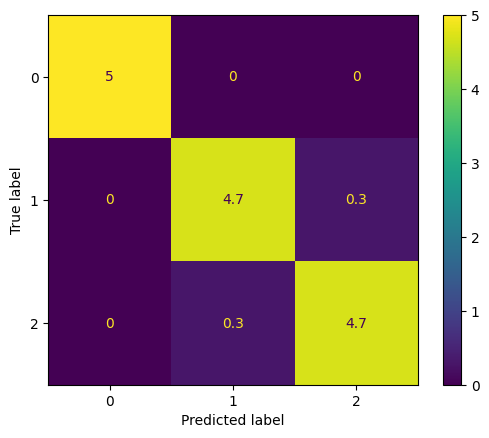

In [25]:
avg_confusion_matrix(confusion_matrices)

### Train only - multiple k values

In [26]:
recalls = []
precisions = []
f1_scores = []
confusion_matrices = []

In [27]:
for i in range(15):
    model = KNeighborsClassifier(n_neighbors = i+1)
    model.fit(X, y)
    y_pred = model.predict(X)
    recalls.append(calculate_recall(y, y_pred))
    precisions.append(calculate_precision(y, y_pred))
    f1_scores.append(calculate_f1(y, y_pred))
    confusion_matrices.append(calculate_confusion_matrix(y, y_pred, display=False))
    

In [28]:
print('Averages')
print('Recall:', np.mean(recalls))
print('Precision:',np.mean(precisions))
print('F1 Score:',np.mean(f1_scores))

Averages
Recall: 0.9768888888888887
Precision: 0.9770552807157372
F1 Score: 0.9768859540877917


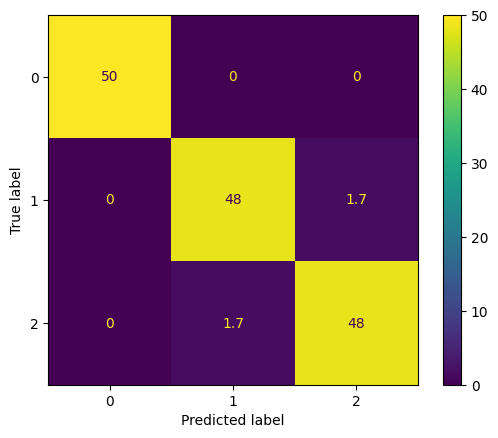

In [29]:
avg_confusion_matrix(confusion_matrices)

### TVT 40-30-30 - multiple k values

In [ ]:
x_train_total, x_test, y_train_total, y_test = split_train_test(X, y, 0.3)
x_train, x_val, y_train, y_val = split_train_test(x_train_total, y_train_total, 0.3)

In [ ]:
recalls = []
precisions = []
f1_scores = []
confusion_matrices = []

In [ ]:
for i in range(15):
    model = KNeighborsClassifier(n_neighbors=i+1)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    recalls.append(calculate_recall(y_val, y_pred, 'weighted'))
    precisions.append(calculate_precision(y_val, y_pred,  'weighted'))
    f1_scores.append(calculate_f1(y_val, y_pred,  'weighted'))
    confusion_matrices.append(calculate_confusion_matrix(y_val, y_pred, display=False))

Averages
Recall: 0.9291666666666667
Precision: 0.9391127622377621
F1 Score: 0.9288535815824146


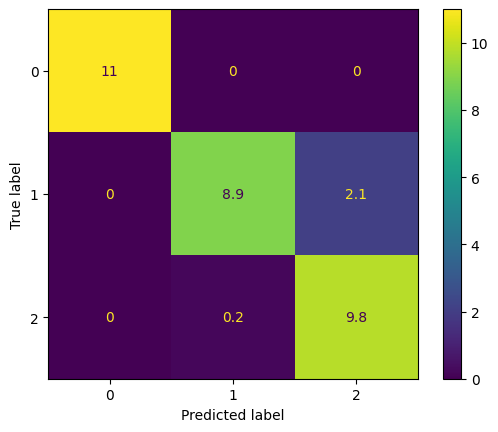

In [ ]:
print('Averages')
print('Recall:', np.mean(recalls))
print('Precision:',np.mean(precisions))
print('F1 Score:',np.mean(f1_scores))
avg_confusion_matrix(confusion_matrices)


In [ ]:
print('Best k')
print('Recall: ', np.argmax(recalls)+1)
print('Precision: ', np.argmax(precisions)+1)
print('F1-Score: ', np.argmax(f1_scores)+1)

Best k
Recall:  3
Precision:  3
F1-Score:  3


In [ ]:
# retrain the model using the best k, k=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train_total, y_train_total)
y_pred = model.predict(x_test)

Recall: 1.0
Precision: 1.0
F-Score: 1.0


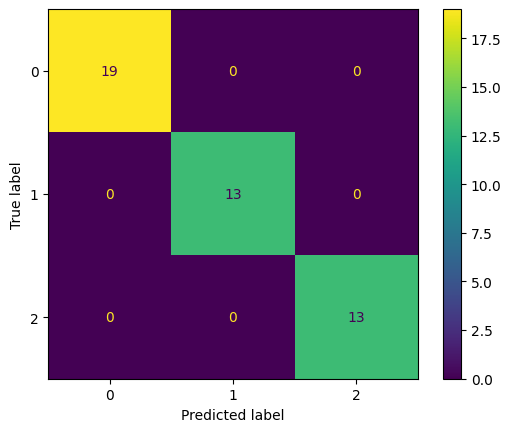

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [ ]:
print('Recall:', calculate_recall(y_test, y_pred, 'weighted'))
print('Precision:', calculate_precision(y_test, y_pred, 'weighted'))
print('F-Score:', calculate_f1(y_test, y_pred, 'weighted'))
calculate_confusion_matrix(y_test, y_pred)

In [ ]:
y_test.value_counts()

0    19
1    13
2    13
Name: target, dtype: int64

### 10 CV - multiple k values

In [57]:
recalls = []
precisions = []
f1_scores = []
confusion_matrices = []

In [58]:
x_train, x_test, y_train, y_test = split_k_fold(X, y, 10)

In [59]:
for i in range(15):
    recalls_avg = []
    precision_avg = []
    f1_avg = []
    confusions_avg = []
    for j in range(len(x_train)):
        model = KNeighborsClassifier(n_neighbors=i+1)
        model.fit(x_train[j], y_train[j])
        y_pred = model.predict(x_test[j])
        recalls_avg.append(calculate_recall(y_pred, y_test[j]))
        precision_avg.append(calculate_precision(y_pred, y_test[j]))
        f1_avg.append(calculate_f1(y_pred, y_test[j]))
        confusions_avg.append(calculate_confusion_matrix(y_pred, y_test[j], display=False))
    recalls.append(np.mean(recalls_avg))
    precisions.append(np.mean(precision_avg))
    f1_scores.append(np.mean(f1_avg))
    confusion_matrices.append(avg_confusion_matrix(confusions_avg, display=False))

Averages
Recall: 0.9727248677248678
Precision: 0.969089947089947
F1 Score: 0.9671913025246359


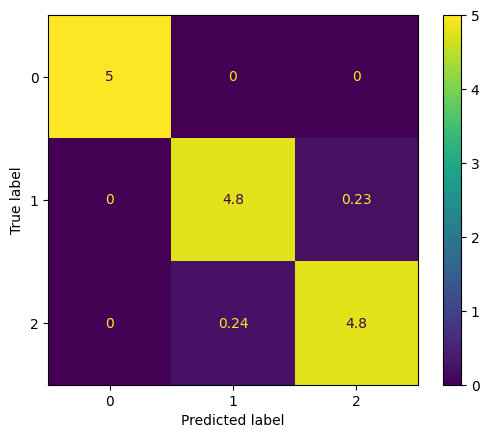

array([[5.        , 0.        , 0.        ],
       [0.        , 4.76      , 0.23333333],
       [0.        , 0.24      , 4.76666667]])

In [60]:
print('Averages')
print('Recall:', np.mean(recalls))
print('Precision:',np.mean(precisions))
print('F1 Score:',np.mean(f1_scores))
avg_confusion_matrix(confusion_matrices)

In [61]:
print('Best k')
print('Recall: ', np.argmax(recalls)+1)
print('Precision: ', np.argmax(precisions)+1)
print('F1-Score: ', np.argmax(f1_scores)+1)

Best k
Recall:  10
Precision:  10
F1-Score:  10


Como se pode observar, o k=10 é o obtem melhores resultados na classificação dos modelos. Assim, o modelo será novamente re-treinado utilizando este valor

In [66]:
recalls = []
precisions = []
f1_scores = []
confusion_matrices = []

In [67]:
for i in range(len(x_train)):
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(x_train[i], y_train[i])
    y_pred = model.predict(x_test[i])

    recalls.append(calculate_recall(y_test[i], y_pred))
    precisions.append(calculate_precision(y_test[i], y_pred))
    f1_scores.append(calculate_f1(y_test[i], y_pred))
    confusion_matrices.append(calculate_confusion_matrix(y_test[i], y_pred, display=False))

Averages
Recall: 0.9802380952380952
Precision: 0.9838095238095239
F1 Score: 0.9801383801383802


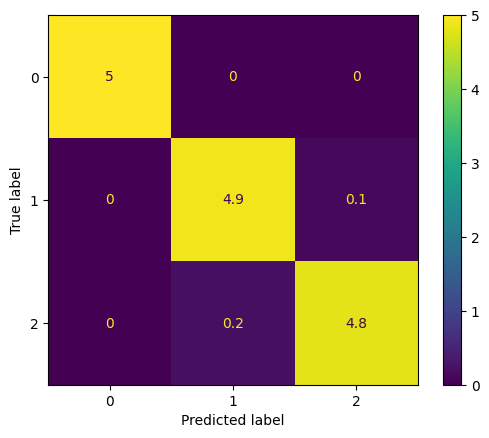

array([[5. , 0. , 0. ],
       [0. , 4.9, 0.1],
       [0. , 0.2, 4.8]])

In [68]:
print('Averages')
print('Recall:', np.mean(recalls))
print('Precision:',np.mean(precisions))
print('F1 Score:',np.mean(f1_scores))
avg_confusion_matrix(confusion_matrices)